In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
# Configuración de pandas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.shape

(8950, 18)

In [6]:
data = data.dropna()

In [7]:
data.shape

(8636, 18)

In [8]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype='object')

### Data Analysis

In [10]:
data['BALANCE'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

Text(0.5, 0.98, 'Distribution of BALANCE')

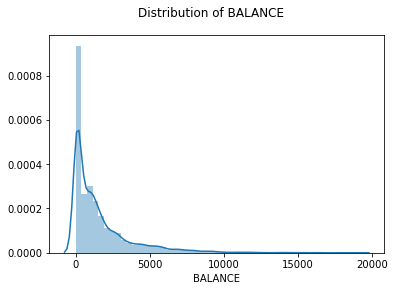

In [12]:
sns.distplot(data['BALANCE'])
plt.suptitle('Distribution of BALANCE')

In [13]:
data['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

Text(0.5, 0.98, 'Distribution of BALANCE_FREQUENCY')

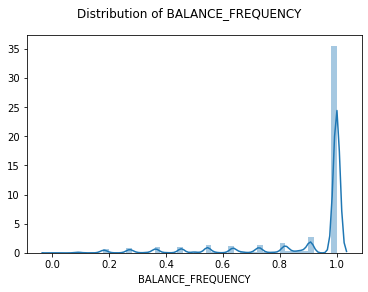

In [14]:
sns.distplot(data['BALANCE_FREQUENCY'])
plt.suptitle('Distribution of BALANCE_FREQUENCY')

In [15]:
data['PURCHASES'].describe()

count     8636.000000
mean      1025.433874
std       2167.107984
min          0.000000
25%         43.367500
50%        375.405000
75%       1145.980000
max      49039.570000
Name: PURCHASES, dtype: float64

Text(0.5, 0.98, 'Distribution of PURCHASES')

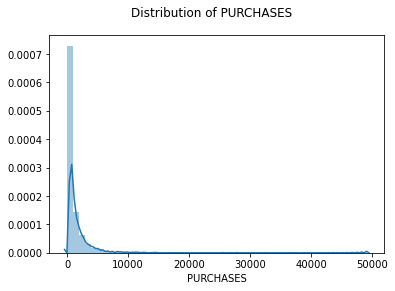

In [16]:
sns.distplot(data['PURCHASES'])
plt.suptitle('Distribution of PURCHASES')

In [17]:
data['ONEOFF_PURCHASES'].describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

Text(0.5, 0.98, 'Distribution of ONEOFF_PURCHASES')

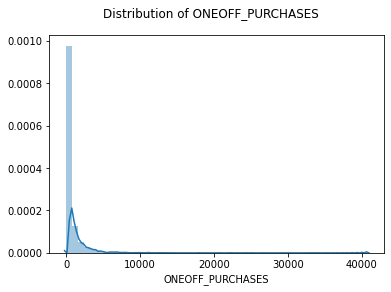

In [18]:
sns.distplot(data['ONEOFF_PURCHASES'])
plt.suptitle('Distribution of ONEOFF_PURCHASES')

In [19]:
data['INSTALLMENTS_PURCHASES'].describe()

count     8636.000000
mean       420.843533
std        917.245182
min          0.000000
25%          0.000000
50%         94.785000
75%        484.147500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

Text(0.5, 0.98, 'Distribution of INTSTALLMENTS_PURCHASES')

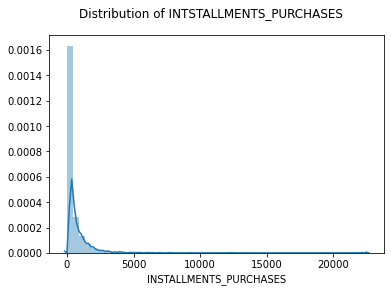

In [20]:
sns.distplot(data['INSTALLMENTS_PURCHASES'])
plt.suptitle('Distribution of INTSTALLMENTS_PURCHASES')

In [21]:
data['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

Text(0.5, 0.98, 'Distribution of CASH_ADVANCE')

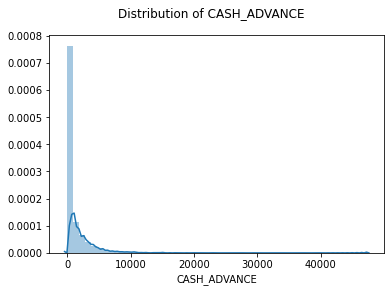

In [22]:
sns.distplot(data['CASH_ADVANCE'])
plt.suptitle('Distribution of CASH_ADVANCE')

In [23]:
data['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

Text(0.5, 0.98, 'Distribution of CASH_ADVANCE_TRX')

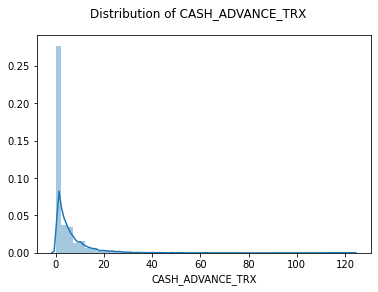

In [24]:
sns.distplot(data['CASH_ADVANCE_TRX'])
plt.suptitle('Distribution of CASH_ADVANCE_TRX')

In [25]:
data['PURCHASES_TRX'].describe()

count    8636.000000
mean       15.033233
std        25.180468
min         0.000000
25%         1.000000
50%         7.000000
75%        18.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

Text(0.5, 0.98, 'Distribution of PURCHASES_TRX')

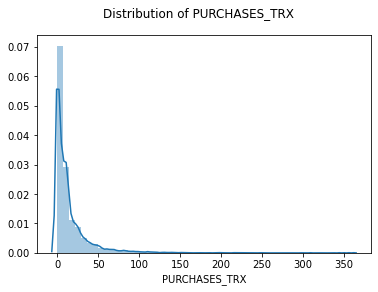

In [26]:
sns.distplot(data['PURCHASES_TRX'])
plt.suptitle('Distribution of PURCHASES_TRX')

In [27]:
data['CREDIT_LIMIT'].describe()

count     8636.000000
mean      4522.091030
std       3659.240379
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Text(0.5, 0.98, 'Distribution of CREDIT_LIMIT')

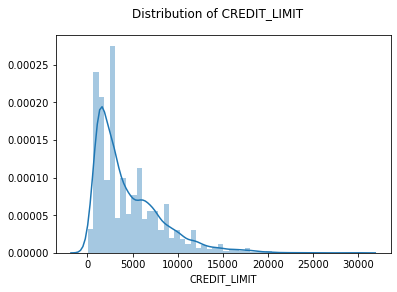

In [28]:
sns.distplot(data['CREDIT_LIMIT'])
plt.suptitle('Distribution of CREDIT_LIMIT')

In [29]:
data['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

Text(0.5, 0.98, 'Distribution of PAYMENTS')

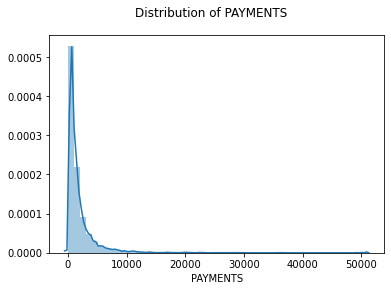

In [30]:
sns.distplot(data['PAYMENTS'])
plt.suptitle('Distribution of PAYMENTS')

In [31]:
data['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Text(0.5, 0.98, 'Distribution of MINIMUM_PAYMENTS')

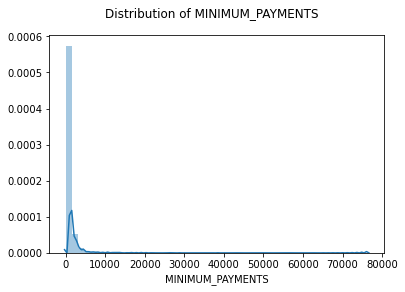

In [32]:
sns.distplot(data['MINIMUM_PAYMENTS'])
plt.suptitle('Distribution of MINIMUM_PAYMENTS')

In [33]:
data['TENURE'].describe()

count    8636.000000
mean       11.534391
std         1.310984
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

#### quantitative vs quantitative

In [34]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype='object')

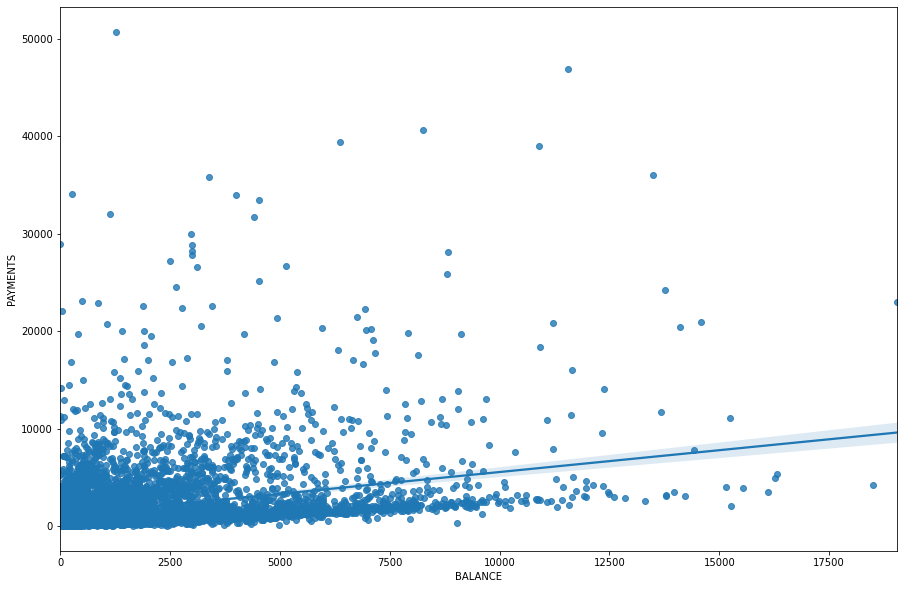

In [38]:
plt.figure(figsize=(15,10))
sns.regplot(x='BALANCE', y='PAYMENTS', data=data)
plt.show()

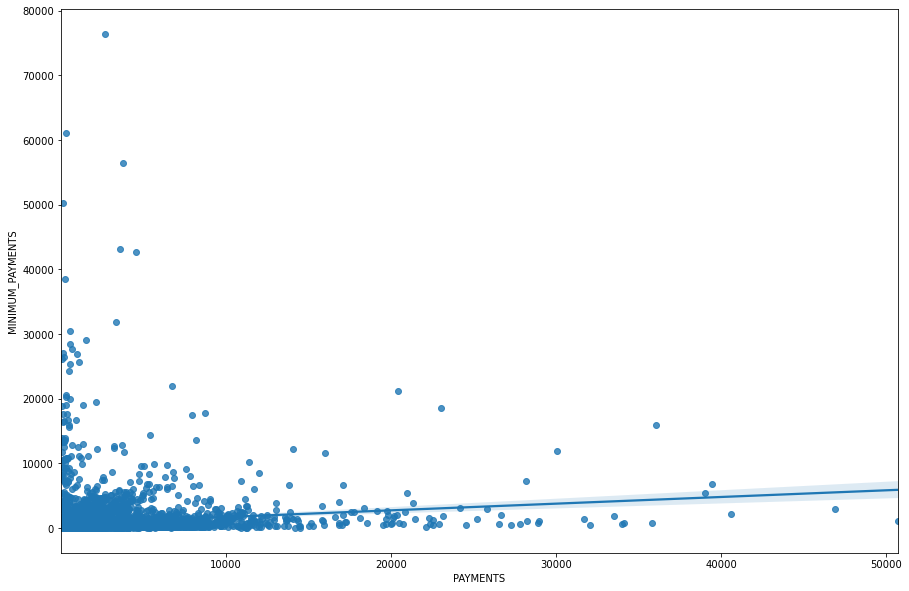

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x='PAYMENTS', y='MINIMUM_PAYMENTS', data=data)
plt.show()

In [42]:
# Inferencial statistics

# Hypothesis testing:
# 1. define null hypothesis and alternate hypothesis
# 2. Choose sample
# 3. Analyse evidence
# 4. Interpret results

# H0: There is no relationship between the explanatory and response 
# H1: There is a statistically significant relationship

# Bivariate statistical tools:
# Anova; chi-square; correlation coefficient

In [43]:
# Explanatory cathegorical and response quantitative: ANOVA
# Explanatory cathegorical and response cathegorical: Chi Square test
# Explanatory quantitative and response cathegorical: classify/bin explanatory variable and use Chi Square test
# Explanatory quantitative and response quantitative: Pearson correlation

In [46]:
print('Association between BALANCE and BALANCEFREQUENCY')
print(scipy.stats.pearsonr(data['BALANCE'], data['BALANCE_FREQUENCY']))

Association between BALANCE and BALANCEFREQUENCY
(0.31014045208567476, 6.805032786030661e-192)


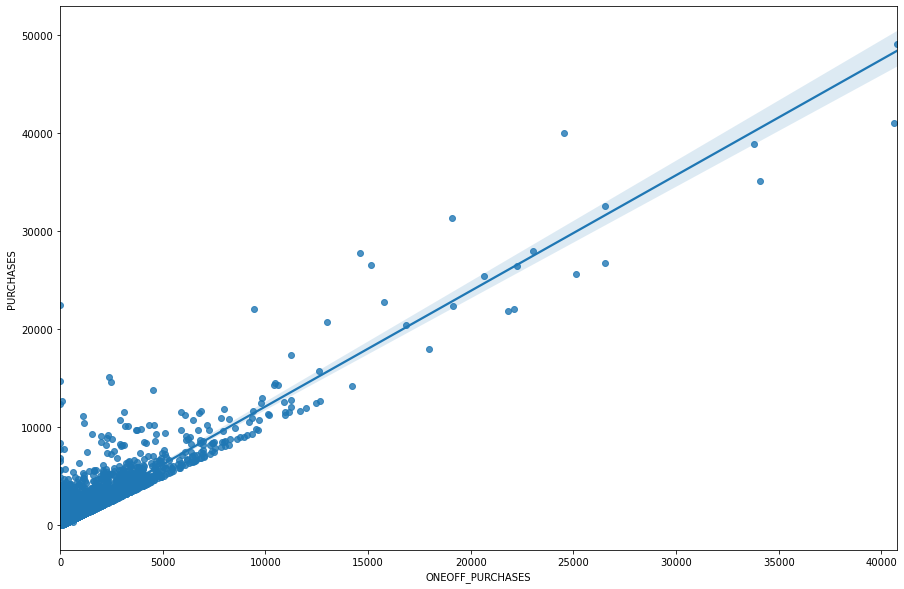

In [51]:
plt.figure(figsize=(15,10))
sns.regplot(x='ONEOFF_PURCHASES', y='PURCHASES', data=data)
plt.show()

In [47]:
print('Association between ONEOFF_PURCHASES and PURCHASES')
print(scipy.stats.pearsonr(data['ONEOFF_PURCHASES'], data['PURCHASES']))

Association between ONEOFF_PURCHASES and PURCHASES
(0.9167802242554187, 0.0)


In [48]:
print('Association between CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX')
print(scipy.stats.pearsonr(data['CASH_ADVANCE_FREQUENCY'], data['CASH_ADVANCE_TRX']))

Association between CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX
(0.7995928545853868, 0.0)


In [49]:
print('Association between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY')
print(scipy.stats.pearsonr(data['PURCHASES_FREQUENCY'], data['PURCHASES_INSTALLMENTS_FREQUENCY']))

Association between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY
(0.8623379116139297, 0.0)
